## Scaling tests of linear algebra operations ##

This notebook documents how various linear algebra operations scale on Haswell vs. KNL.

*Stephen Bailey*<br>
Lawrence Berkeley National Lab<br>
Spring 2017

### Setup at NERSC ###
```
module load python/3.5-anaconda
cd $SCRATCH/desi/knlcode/knltest/code
python linalg-scaling.py

srun -n 1 -c 24 python linalg-scaling.py
srun -n 1 -c 256 python linalg-scaling.py

#- KNL
export OMP_NUM_THREADS=256
srun -n 1 -c 256 --cpu_bind=cores python linalg-scaling.py

#- HSW
export OMP_NUM_THREADS=64
srun -n 1 -c 64 --cpu_bind=cores python linalg-scaling.py

export OMP_NUM_THREADS=32
srun -n 1 -c 32 --cpu_bind=cores python linalg-scaling.py
```

## To do ##

* repeat tests with IDP 2 instead of Anaconda distribution
* add scaling tests for matrix-matrix multiply, matrix-vector multipy, and dot products

In [1]:
%pylab inline
import numpy as np
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [2]:
mac = Table.read('data/linalg-scaling/mac.txt', format='ascii')
hsw = Table.read('data/linalg-scaling/hsw.txt', format='ascii')
knl = Table.read('data/linalg-scaling/knl.txt', format='ascii')

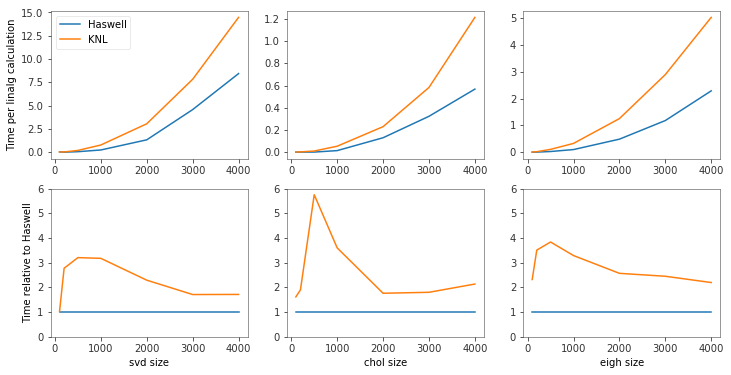

In [5]:
figure(figsize=(12,6))
for i, method in enumerate(['svd', 'chol', 'eigh']):
    subplot(231+i)
    plot(hsw['n'], hsw[method], label='Haswell')
    plot(knl['n'], knl[method], label='KNL')
    # plot(mac['n'], mac[method], label='mac')
    xticks([0,1000,2000,3000,4000])
    if i == 0:
        ylabel('Time per linalg calculation')
        legend(loc='upper left')
    subplot(234+i)
    plot(hsw['n'], hsw[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)
    plot(knl['n'], knl[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)
    # plot(mac['n'], mac[method]/hsw[method]); xlabel('{} size'.format(method)); ylim(0,6)

    xticks([0,1000,2000,3000,4000])
    if i == 0:
        ylabel('Time relative to Haswell')



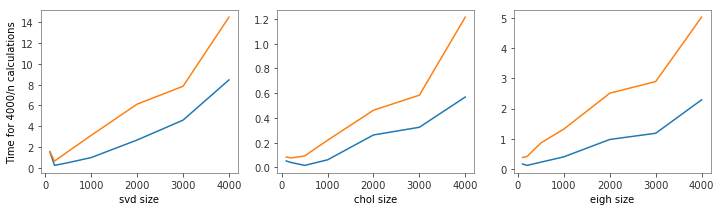

In [7]:
figure(figsize=(12,3))
for i, method in enumerate(['svd', 'chol', 'eigh']):
    subplot(131+i)
    plot(hsw['n'], (4000/hsw['n'])*hsw[method], label='Haswell')
    plot(knl['n'], (4000/hsw['n'])*knl[method], label='KNL')
    xlabel('{} size'.format(method))

subplot(131)
ylabel('Time for 4000/size calculations')
